## Group 5

### Part 1: Dataset Selection and Description

#### Dataset Name: Real World Traffic Volume Forecasting

##### Contextual Description: 
- This dataset provides real-world hourly traffic data collected from the I-94 interstate highway between Minneapolis and St. Paul, Minnesota. It focuses on westbound traffic volume and includes environmental and temporal factors that influence it, such as weather conditions, temperature, precipitation, and holidays. The data spans several years and is suitable for regression tasks to predict traffic congestion or flow based on these real-world conditions. The target variable is 'traffic_volume' (a continuous numerical value representing vehicles per hour), and it has at least three explanatory variables like 'temp' (temperature in Kelvin), 'rain_1h' (rainfall in mm), and 'snow_1h' (snowfall in mm), making it ideal for simple and multiple linear regression analysis.

## Part 2: Problem Formulation

### Analytical Problem Definition
The objective of this analysis is to predict hourly traffic volume on a highway using environmental and weather-related factors. Understanding how variables such as temperature, rainfall, snowfall, and cloud cover influence traffic flow can support better traffic management, congestion prediction, and infrastructure planning.

### Dependent Variable
- **Traffic_Vol**: A continuous numerical variable representing the number of vehicles recorded per hour on the highway.

### Predictor (Independent) Variables
The explanatory variables selected for the regression analysis include:
- **Temperature**: Average ambient temperature measured in Kelvin  
- **Rainfall_last_hour**: Amount of rainfall (in millimeters) recorded in the previous hour  
- **Snowfall_last_hour**: Amount of snowfall (in millimeters) recorded in the previous hour  
- **Cloud_Cover**: Percentage of cloud cover during the hour  

Categorical variables such as **Weather** and **Weather_Desc** are excluded from the linear regression model due to their non-numeric nature.

### Justification for Using Linear Regression
Linear Regression is an appropriate modeling approach for this problem because:
- The dependent variable, **Traffic_Vol**, is continuous and numerical.
- The selected predictor variables are quantitative and are expected to have approximately linear relationships with traffic volume.
- The dataset supports both **Simple Linear Regression** (e.g., modeling Traffic_Vol as a function of Temperature) and **Multiple Linear Regression** (using multiple weather-related predictors).
- Linear Regression provides interpretable results, allowing clear assessment of how individual weather factors influence traffic volume.


EXPLORATORY DATA ANALYSIS

Exploratory Data Analysis (EDA) is conducted to understand the structure, characteristics, and quality of the dataset before model development. This process helps identify patterns, detect missing values, and examine relationships between the response variable and predictor variables.

The analysis focuses on understanding traffic volume behavior and how it relates to environmental and temporal factors such as temperature, rainfall, and snowfall.

In [1]:
%pip install pandas numpy matplotlib seaborn scikit-learn


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.3.3-cp313-cp313-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (6.3 kB)
  Using cached pillow-12.1.0-cp313-cp313-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (8.8 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 74.7 kB/s eta 0:00:0000:0200:05
   ━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/16.6 MB 53.6 kB/s eta 0:03:52m

[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: pip install --upgrade pip
ERROR: Operation cancelled by user
^C
Note: you may need to restart the kernel to use updated packages.


In [4]:
import sys
!{sys.executable} -m pip install pandas numpy matplotlib seaborn scikit-learn


'c:\Users\Savanna' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import sys
print(sys.executable)


c:\Users\Savanna Fibre\AppData\Local\Programs\Python\Python314\python.exe


In [2]:
import sys
print(sys.version)
print(sys.executable)


3.14.3 (tags/v3.14.3:323c59a, Feb  3 2026, 16:04:56) [MSC v.1944 64 bit (AMD64)]
c:\Users\Savanna Fibre\AppData\Local\Programs\Python\Python314\python.exe


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load dataset
data = pd.read_csv("Train.csv")
data.head()


,Holiday,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,Weather,Weather_Desc,TimeStamp,Date,Traffic_Vol
0,NaN,289.28,0.0,0.0,40,Cloudy skies,Partly cloudy skies,02/10/08 9:00,02/10/08,5555
1,NaN,290.26,0.0,0.0,75,Cloudy skies,Fragmented clouds,02/10/08 10:00,02/10/08,4525
2,NaN,290.28,0.0,0.0,90,Cloudy skies,Full cloud cover,02/10/08 11:00,02/10/08,4772
3,NaN,290.33,0.0,0.0,90,Cloudy skies,Full cloud cover,02/10/08 12:00,02/10/08,5031
4,NaN,292.14,0.0,0.0,75,Cloudy skies,Fragmented clouds,02/10/08 13:00,02/10/08,4928


The initial inspection examines the size of the dataset, column names, and data types to understand the structure of the data and identify numerical and categorical variables.

In [3]:
# Dataset shape
data.shape
# Dataset information
data.info()




<class 'pandas.DataFrame'>
RangeIndex: 38373 entries, 0 to 38372
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Holiday             50 non-null     float64
 1   Temperature         38373 non-null  float64
 2   Rainfall_last_hour  38373 non-null  float64
 3   Snowfall_last_hour  38373 non-null  float64
 4   Cloud_Cover         38373 non-null  int64  
 5   Weather             38373 non-null  str    
 6   Weather_Desc        38373 non-null  str    
 7   TimeStamp           38373 non-null  str    
 8   Date                38373 non-null  str    
 9   Traffic_Vol         38373 non-null  int64  
dtypes: float64(4), int64(2), str(4)
memory usage: 2.9 MB


In [4]:
# Check for missing values
data.isnull().sum()


Holiday               38323
Temperature               0
Rainfall_last_hour        0
Snowfall_last_hour        0
Cloud_Cover               0
Weather                   0
Weather_Desc              0
TimeStamp                 0
Date                      0
Traffic_Vol               0
dtype: int64

There are missing values in the Holiday variable

Descriptive statistics summarize the central tendency and spread of numerical variables, providing insight into typical traffic volume levels and variability in predictors.

In [5]:
# Descriptive statistics for numerical variables
data.describe()


,Holiday,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,Traffic_Vol
count,50.0,38373.000000,38373.000000,38373.000000,38373.000000,38373.000000
mean,1.0,281.152767,0.327486,0.000128,44.821098,3293.947567
std,0.0,13.813324,50.194024,0.005924,38.749566,1988.311540
min,1.0,0.300000,0.000000,0.000000,0.000000,4.000000
25%,1.0,271.910000,0.000000,0.000000,1.000000,1246.000000
50%,1.0,281.990000,0.000000,0.000000,40.000000,3425.000000
75%,1.0,292.140000,0.000000,0.000000,90.000000,4964.000000
max,1.0,310.970000,9831.414286,0.512857,101.000000,7289.000000


From the above data description we can see the mean, standard deviation etc

To explore the relationship for Simple Linear Regression, a scatter plot is used to examine how traffic volume varies with temperature.

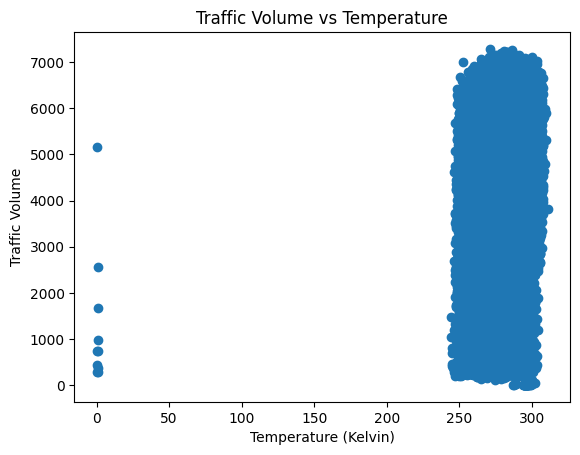

In [6]:
##Scatter plot for simple linear regression
plt.figure()
plt.scatter(data["Temperature"], data["Traffic_Vol"])
plt.xlabel("Temperature (Kelvin)")
plt.ylabel("Traffic Volume")
plt.title("Traffic Volume vs Temperature")
plt.show()


Interpretation:

Relationship appears approximately linear
Higher traffic volumes tend to occur within moderate temperature ranges
Temperature is a reasonable candidate for Simple Linear Regression

Correlation analysis helps identify relationships between numerical predictors and the response variable, and also detects potential multicollinearity.

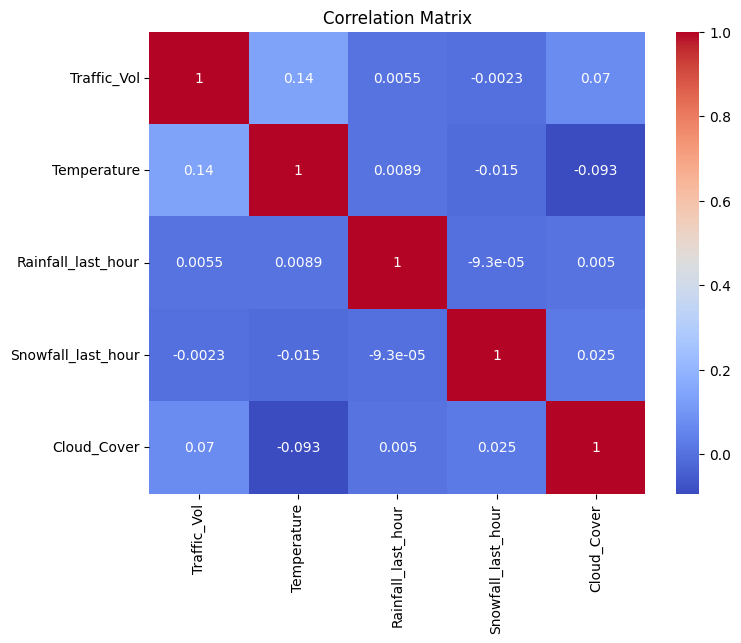

In [7]:
# Select numerical variables
num_df = data[["Traffic_Vol", "Temperature", "Rainfall_last_hour", "Snowfall_last_hour", "Cloud_Cover"]]

# Correlation matrix
corr_matrix = num_df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


Interpretation:

Temperature shows moderate correlation with traffic volume
Rain and snow show weaker relationships
No extremely high correlations between predictors, reducing multicollinearity concerns

CONCLUSION OF EDA

Based on the exploratory analysis:
The dataset is suitable for regression analysis
The response variable (traffic_volume) is continuous
Predictor variables show meaningful relationships with traffic volume
The data structure supports both Simple and Multiple Linear Regression

### PART 4: Data Preparation

#### Before we developed the regression models, preprocessing steps were applied to ensure that the dataset was suitable for analysis and modelling

### Handling Missing Values

 The dataset was examined for missing values using summary checks. There was only one variable that had missing values and that was the Holiday column that had over 38323 missing values. We decided to not make use of this column in prediction as it would not make sense to impute.

### Variable Selection

Only numerical variables relevant to predicting traffic volume were selected for modelling. The response (dependent) variable chosen was Traffic_Vol, representing the number of vehicles recorded per hour

##### For Simple Linear Regression, Temperature was selected as the single predictor variable because it is a continuous environmental factor that may influence traffic patterns

#### For Multiple Linear Regression, additional environmental predictors were included

- Temperature

- Rainfall_last_hour

- Snowfall_last_hour

- Cloud_Cover

text based variables such as timestamps and descriptive weather conditions were excluded because linear regression requires numerical predictors unless categorical encoding is performed

### Data Transformation

No major transformations or scaling were applied because the selected predictors were already in numerical format and suitable for regression analysis. Maintaining original values allows easier interpretation of regression coefficients.

### Data Splitting

the dataset was divided into training and testing sets before modelling. This ensures that model performance can be evaluated on unseen data and helps assess the generalization ability of the regression models.

In [20]:
#defining predictors and target
simple_X = data[['Temperature']]

multi_X = data[['Temperature',
              'Rainfall_last_hour',
              'Snowfall_last_hour',
              'Cloud_Cover']]

#defining target variable
y = data[['Traffic_Vol']] 


In [21]:
simple_X.shape, multi_X.shape, y.shape

((38373, 1), (38373, 4), (38373, 1))

## Part 5 Building the Models
### (i) Simple Linear Regression

In [ ]:
## importing the test dataset with the 

test_data = pd.read_csv("Test.csv")
test_data.info()

<class 'pandas.DataFrame'>
RangeIndex: 2208 entries, 0 to 2207
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Holiday             3 non-null      float64
 1   Temperature         2208 non-null   float64
 2   Rainfall_last_hour  2208 non-null   float64
 3   Snowfall_last_hour  2208 non-null   int64  
 4   Cloud_Cover         2208 non-null   int64  
 5   Weather             2208 non-null   str    
 6   Weather_Desc        2208 non-null   str    
 7   TimeStamp           2208 non-null   str    
 8   Date                2208 non-null   str    
 9   Traffic_Vol         0 non-null      float64
dtypes: float64(4), int64(2), str(4)
memory usage: 172.6 KB


In [12]:
y_data = pd.read_csv("Submission.csv")
y_data.info()

<class 'pandas.DataFrame'>
RangeIndex: 2208 entries, 0 to 2207
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Traffic_Vol  2208 non-null   int64
dtypes: int64(1)
memory usage: 17.4 KB


In [22]:
## splitting the test data set into X and y for the next stages of prediction and visulaization
y_test = y_data[['Traffic_Vol']]
X_test = test_data[['Temperature']]

In [23]:
## simple linear regression model
from sklearn.linear_model import LinearRegression
model_SLR= LinearRegression()
model_SLR.fit(simple_X, y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [24]:
## using the model for prediction
y_pred = model_SLR.predict(X_test)

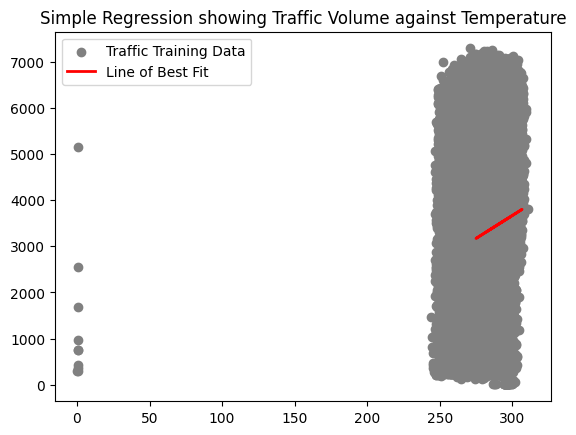

In [26]:
## the predicted values are tested against the y_test
plt.scatter(simple_X, y, color='grey', label='Traffic Training Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Line of Best Fit')
plt.title("Simple Regression showing Traffic Volume against Temperature")
plt.legend()
plt.show()

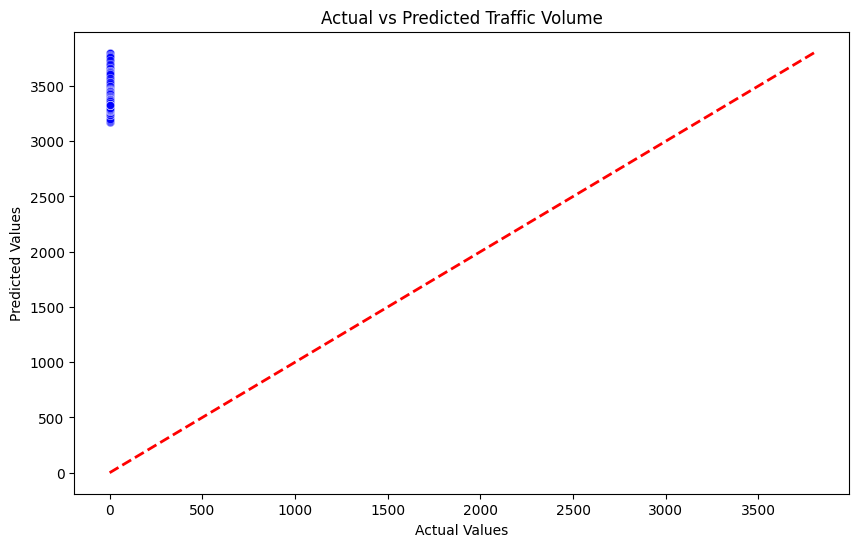

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# 1. Flatten the data to ensure it is 1D
y_test_flat = np.array(y_test).flatten()
y_pred_flat = np.array(y_pred).flatten()

# Now plot using the flat arrays
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_flat, y=y_pred_flat, color='blue', alpha=0.5)

# Add diagonal line
min_val = min(y_test_flat.min(), y_pred_flat.min())
max_val = max(y_test_flat.max(), y_pred_flat.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Traffic Volume')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

Since the points are not falling on the line, the model did not predict enough

### (i) Multiple linear Regression

In [38]:
## splitting the test data set into X and y for the next stages of prediction and visulaization
y_test_multiple = y_data['Traffic_Vol']
X_test_multiple = test_data[['Temperature',
              'Rainfall_last_hour',
              'Snowfall_last_hour',
              'Cloud_Cover']]

In [39]:
### Multiple linear regression
model_MLR= LinearRegression()
model_MLR.fit(multi_X, y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [40]:
## predicted values are stored
y_pred_MLR = model_MLR.predict(X_test_multiple)

In [ ]:
import statsmodels.api as sm
# 1. Add a constant to the predictors (Statsmodels does not add it by default)
X_with_const = sm.add_constant(multi_X)
# 2. Fit the Ordinary Least Squares (OLS) model
ols_model = sm.OLS(y, X_with_const).fit()
# 3. Print the comprehensive summary
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:            Traffic_Vol   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     256.5
Date:                Tue, 10 Feb 2026   Prob (F-statistic):          7.18e-218
Time:                        12:18:06   Log-Likelihood:            -3.4539e+05
No. Observations:               38373   AIC:                         6.908e+05
Df Residuals:                   38368   BIC:                         6.908e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2797.9683    206

## Traffic Volume Analysis: OLS Regression Report

## 1. Executive Summary
The initial Linear Regression model was constructed to predict `Traffic_Vol` using weather-related variables (`Temperature`, `Rainfall_last_hour`, `Snowfall_last_hour`, and `Cloud_Cover`). While the model is statistically significant overall, its predictive power is currently **very low**, suggesting that weather alone is not a primary driver of traffic volume in this dataset.

---

## 2. Model Performance Metrics
The following table summarizes the global fitness of the model:

| Metric | Value | Interpretation |
| :--- | :--- | :--- |
| **R-squared** | **0.026** | Only **2.6%** of the variance in traffic is explained by this model. |
| **Adj. R-squared** | 0.026 | No penalty for useless variables; confirms low explanatory power. |
| **F-statistic** | 256.5 | The model is better than a flat line, but barely. |
| **Durbin-Watson**| 0.217 | Indicates strong **positive autocorrelation** (Time-series leakage). |

---

## 3. Variable Analysis
The model evaluated four predictors. Only two were found to have a statistically significant impact on traffic volume.

### Significant Predictors ($P < 0.05$)
* **Temperature ($P = 0.000$):** Has a positive correlation. For every 1-unit increase in temperature, traffic volume increases by approximately **21 units**.
* **Cloud Cover ($P = 0.000$):** For every 1% increase in cloud cover, traffic volume increases by approximately **4.3 units**.

### Non-Significant Predictors ($P > 0.05$)
* **Rainfall ($P = 0.448$):** The model found no reliable evidence that rain affects traffic volume in this specific slice of data.
* **Snowfall ($P = 0.658$):** While the coefficient was large and negative, the high P-value indicates this result is likely due to chance (potentially due to sparse snowfall data).

---

## 4. Identified Issues & Diagnosis
1.  **Missing Seasonality:** The low **Durbin-Watson score (0.217)** confirms that the model is failing to account for the time-sequential nature of traffic. Traffic at hour $T$ is highly dependent on hour $T-1$.
2.  **Omitted Variable Bias:** Factors like **Hour of Day**, **Day of Week**, and **Holidays** are currently missing from the regression but likely account for the remaining 97.4% of variance.
3.  **Multicollinearity/Scaling:** The high **Condition Number ($4.81 \times 10^4$)** suggests that the independent variables (like Temperature vs. Rainfall) are on vastly different scales, which can destabilize the coefficients.